## **Titanic Surviva challenge**

#### **importing Libraries**

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [89]:
## redaing data
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

## Data Structure

In [90]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [91]:
print(train.head(2))
print(test.head(2))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Cabin Embarked  
0      0  A/5 21171   7.2500   NaN        S  
1      0   PC 17599  71.2833   C85        C  
   PassengerId  Pclass                              Name     Sex   Age  SibSp  \
0          892       3                  Kelly, Mr. James    male  34.5      0   
1          893       3  Wilkes, Mrs. James (Ellen Needs)  female  47.0      1   

   Parch  Ticket    Fare Cabin Embarked  
0      0  330911  7.8292   NaN        Q  
1      0  363272  7.0000   NaN        S  


## Handling missing values

In [92]:
# checking training Dataset --> DataTypes,Missing Values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [93]:
# checking testing Dataset --> DataTypes,Missing Values
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


## **Handling Training Dataset Missing Values**

### **Cabin Column**

In [94]:
# Removing Cabin Column from test and train   more then 60% data is missing in train
# more then 30% in training dataset
train.drop(columns='Cabin',inplace=True)
test.drop(columns='Cabin',inplace=True)

In [95]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


### **Embarked Column**

In [96]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [97]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [98]:
train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [99]:
# Relacing with max value in datset
train['Embarked'].fillna('S',inplace=True)

C:\Users\Micro Tech\AppData\Local\Temp\ipykernel_7692\1155006281.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Embarked'].fillna('S',inplace=True)


In [100]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

### **Testing Columns**

In [101]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [102]:
# replacing misssing value in fare with mean value
test['Fare'].fillna(test['Fare'].mean(),inplace=True)

C:\Users\Micro Tech\AppData\Local\Temp\ipykernel_7692\2887986388.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Fare'].fillna(test['Fare'].mean(),inplace=True)


### **Age Column**
 - Mean,Median,interpolate
 - function -> randint(mean-std,mean+std,177)
 - (lower,higher,total missing values)
 - retain normal curve

In [103]:
## Using Interpolation technique will find pattern and fill it by itself in train dataset
train_interpolate=train['Age'].interpolate()
train['Age'].fillna(train_interpolate,inplace=True)

C:\Users\Micro Tech\AppData\Local\Temp\ipykernel_7692\1807790619.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train_interpolate,inplace=True)


In [104]:
# Using Interpolation tecnique will find pattern and fill it by itself in test dataset
test_age_interpolated = test['Age'].interpolate()
# Step 2: Fill missing values in train['Age'] with interpolated values from test['Age']
test['Age'].fillna(test_age_interpolated, inplace=True)

C:\Users\Micro Tech\AppData\Local\Temp\ipykernel_7692\1666084118.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Age'].fillna(test_age_interpolated, inplace=True)


In [105]:
# missing Values Removed
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


## Data Preprocessing
 - EDA Exploratory Data Analysis

In [106]:
## checking correlation / patterns
train.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [107]:
## checking correlation / patterns
train.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [108]:
## checking correlation / patterns
train.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

In [109]:
import seaborn as sns

C:\Users\Micro Tech\AppData\Local\Temp\ipykernel_7692\4197712070.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'][train['Survived']==0])
C:\Users\Micro Tech\AppData\Local\Temp\ipykernel_7692\4197712070.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'][train['Surviv

<Axes: xlabel='Age', ylabel='Density'>

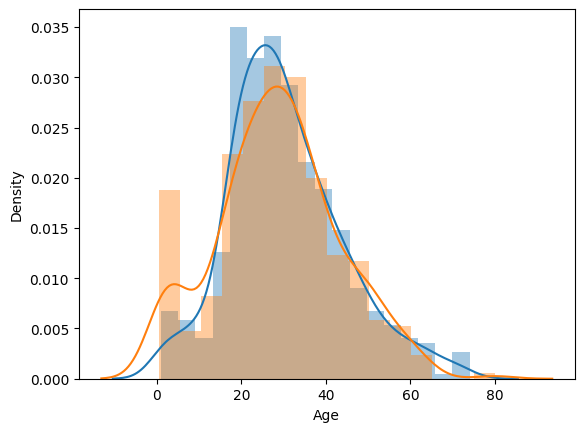

In [110]:
## checking correlation / patterns
sns.distplot(train['Age'][train['Survived']==0])
sns.distplot(train['Age'][train['Survived']==1])

C:\Users\Micro Tech\AppData\Local\Temp\ipykernel_7692\2876954806.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Fare'][train['Survived']==0])
C:\Users\Micro Tech\AppData\Local\Temp\ipykernel_7692\2876954806.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Fare'][train['Surv

<Axes: xlabel='Fare', ylabel='Density'>

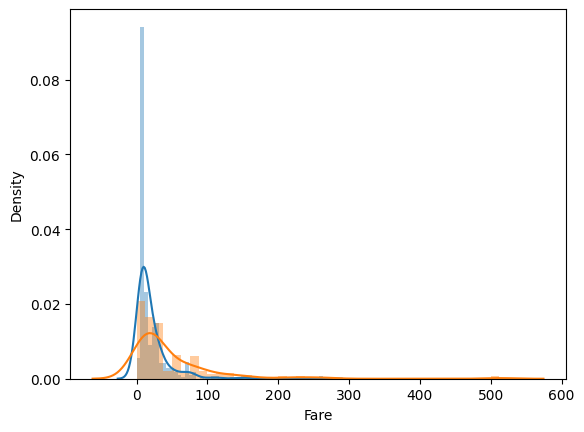

In [111]:
## checking correlation / patterns
sns.distplot(train['Fare'][train['Survived']==0])
sns.distplot(train['Fare'][train['Survived']==1])

In [112]:
# dropping useless columns from training dataset
train.drop(columns=['Name','Ticket'],inplace=True)  # no effect

In [113]:
# dropping useless columns from testing dataset
test.drop(columns=['Name','Ticket'],inplace=True)

In [28]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [114]:
passengeID=test['PassengerId']

In [115]:
# Merging Columns train
train['family']=train['SibSp'] + train['Parch'] +1

In [116]:
# Mdropping Extra Columns 
train.drop(columns=['SibSp','Parch'],inplace=True)

In [117]:
# Merging Columns testing Dataset
test['family']=test['SibSp'] + test['Parch'] +1

In [118]:
# dropping Extra Columns testing dataset
test.drop(columns=['SibSp','Parch'],inplace=True)

In [119]:
train['family'].value_counts()

family
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64

In [120]:
# Compacting columnn
train.groupby(['family'])['Survived'].mean()

family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [121]:

def cal(number):
    if number==1:
        return "Alone"
    elif number>1 and number<5:
        return "Medium"
    else:
        return "Large"

In [122]:
train["family_size"]=train['family'].apply(cal)

In [123]:
test["family_size"]=test['family'].apply(cal)

In [124]:
train.drop(columns='family',inplace=True)
test.drop(columns='family',inplace=True)

In [125]:
train.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked',
       'family_size'],
      dtype='object')

In [126]:
test.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked',
       'family_size'],
      dtype='object')

## Encoding
 -  Text To Numerical

In [127]:
# Label Encoding assigns a unique integer to each category. This method does not take into account any ordinal relationship
#between categories and is often used for categorical variables where the categories do not have an intrinsic order.
## CALC,CAEC,MTRANS,NObeyesdad  Check for Order
# NObeyesdad BMI Test Height and Age
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
train_object_column=train.select_dtypes(include=object)
test_object_column=test.select_dtypes(include=object)

In [128]:
train_object_column=train.select_dtypes(include=object)
test_object_column=test.select_dtypes(include=object)

In [129]:
for i in train_object_column:
    train[i]=label_encoder.fit_transform(train[i])

In [130]:
for i in test_object_column:
    test[i]=label_encoder.fit_transform(test[i])

In [131]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,family_size
0,1,0,3,1,22.0,7.2500,2,2
1,2,1,1,0,38.0,71.2833,0,2
2,3,1,3,0,26.0,7.9250,2,0
3,4,1,1,0,35.0,53.1000,2,2
4,5,0,3,1,35.0,8.0500,2,0


## **Splitting DataSet into test & train**

In [132]:
## splitting dataset
X=train.drop(columns=['Survived'])
y=train['Survived']

In [133]:
 from sklearn.model_selection import train_test_split

In [134]:
(X_train,X_test,y_train,y_test)=train_test_split(X,y,test_size=0.2,random_state=42)

In [135]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [136]:
clf = RandomForestClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [137]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

In [138]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Detailed classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Confusion Matrix:
[[92 13]
 [21 53]]


In [140]:
Xf=test.iloc[:,:].values

In [141]:
yf=clf.predict(Xf)

D:\Anaconda\envs\DS_Cohortort\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [142]:
final=pd.DataFrame()

In [144]:
final['passengeID']=passengeID
final['Survived']=yf

In [151]:
final['Survived'].value_counts()

Survived
0    281
1    137
Name: count, dtype: int64

In [153]:
final.to_csv(index=False)

'passengeID,Survived\r\n892,0\r\n893,0\r\n894,0\r\n895,0\r\n896,0\r\n897,0\r\n898,1\r\n899,0\r\n900,1\r\n901,0\r\n902,0\r\n903,0\r\n904,1\r\n905,0\r\n906,1\r\n907,1\r\n908,0\r\n909,0\r\n910,0\r\n911,1\r\n912,0\r\n913,1\r\n914,1\r\n915,0\r\n916,1\r\n917,0\r\n918,1\r\n919,0\r\n920,0\r\n921,0\r\n922,0\r\n923,0\r\n924,1\r\n925,0\r\n926,1\r\n927,0\r\n928,0\r\n929,0\r\n930,0\r\n931,1\r\n932,0\r\n933,0\r\n934,0\r\n935,1\r\n936,1\r\n937,0\r\n938,1\r\n939,0\r\n940,1\r\n941,1\r\n942,0\r\n943,0\r\n944,1\r\n945,1\r\n946,0\r\n947,0\r\n948,0\r\n949,0\r\n950,0\r\n951,1\r\n952,0\r\n953,0\r\n954,0\r\n955,1\r\n956,1\r\n957,1\r\n958,1\r\n959,0\r\n960,1\r\n961,1\r\n962,1\r\n963,0\r\n964,0\r\n965,1\r\n966,1\r\n967,0\r\n968,0\r\n969,1\r\n970,0\r\n971,1\r\n972,1\r\n973,0\r\n974,0\r\n975,0\r\n976,0\r\n977,0\r\n978,1\r\n979,0\r\n980,1\r\n981,1\r\n982,0\r\n983,0\r\n984,1\r\n985,0\r\n986,1\r\n987,0\r\n988,1\r\n989,0\r\n990,0\r\n991,0\r\n992,1\r\n993,0\r\n994,0\r\n995,0\r\n996,0\r\n997,0\r\n998,0\r\n999,0\r\n1000

# **The END**